In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import sys, os, csv, importlib
import numpy as np
import matplotlib.pyplot as plt
import copy

In [3]:
repo_paths = ['/home/simonealbanesi/repos/IPAM2021_ML/', '/home/simone/repos/IPAM2021_ML/', 
             '/Users/simonealbanesi/repos/IPAM2021_ML/']
for rp in repo_paths:
    if os.path.isdir(rp):
        repo_path = rp
        break
sys.path.insert(0, repo_path+'utils/')

In [4]:
import fancyplots as fp
import sklassyNN  as sknn
from split_MDC6_data import split_MDC6_data

## Input

In [5]:
hlayers_sizes = (400,400)
show_figs     = True
save_figs     = False
features2use  = 'm1m2chi1chi2'
model_name    = 'sklassyNN_m1m2chi1chi2'

## Load data

In [6]:
pips = {}
pips['gstlal'] = lambda:0
pips['pycbc']  = lambda:0 
pips['mbta']   = lambda:0
pip_keys = list(pips.keys())

In [7]:
for p in pip_keys:
    test_datasets = np.loadtxt(repo_path+'datasets/MDC6/'+p+'.txt')
    test_data_split = split_MDC6_data(test_datasets, features=features2use)
    test_inj = test_data_split['inj']
    test_rec = test_data_split['rec']

    names     = test_data_split['names']
    nfeatures = len(test_inj[0,:])
    ntest     = len(test_inj[:,0])
    
    pips[p].test_inj  = test_inj
    pips[p].test_rec  = test_rec
    pips[p].names     = names
    pips[p].nfeatures = nfeatures
    pips[p].ntest     = ntest
    
    print('-'*10, p, '-'*10, sep='\n')
    print('min m1 (inj/rec): ', min(test_inj[:,0]), '\t', min(test_rec[:,0]))
    print('max m1 (inj/rec): ', max(test_inj[:,0]), '\t', max(test_rec[:,0]))
    print('min m2 (inj/rec): ', min(test_inj[:,1]), '\t', min(test_rec[:,1]))
    print('max m2 (inj/rec): ', max(test_inj[:,1]), '\t', max(test_rec[:,1]))
    print('')
    
    del test_inj, test_rec, ntest

----------
gstlal
----------
min m1 (inj/rec):  1.1036795526417522 	 1.0795629
max m1 (inj/rec):  160.49439752130704 	 373.01093
min m2 (inj/rec):  1.0171329902143806 	 0.96610439
max m2 (inj/rec):  150.6131801985733 	 202.68649

----------
pycbc
----------
min m1 (inj/rec):  1.0644755134220176 	 1.001971
max m1 (inj/rec):  160.2152102881105 	 494.54556
min m2 (inj/rec):  1.0118250944578464 	 1.0000064
max m2 (inj/rec):  155.85095600720217 	 104.44382

----------
mbta
----------
min m1 (inj/rec):  1.1036795526417522 	 1.125331
max m1 (inj/rec):  112.13134390165894 	 192.48429
min m2 (inj/rec):  1.0118250944578464 	 1.000142
max m2 (inj/rec):  98.91180904848139 	 70.515851



In [8]:
loaded_NN = sknn.RegressionNN(hlayers_sizes=hlayers_sizes, model2load=model_name)
NNs = {}
loaded_NN.print_info()

batch_size          : 128
epochs              : 50
function            : MSE
hidden_activation   : relu
hlayers_sizes       : (400, 400)
learning_rate       : 0.001
model               : MLPRegressor(alpha=0.001, batch_size=128, hidden_layer_sizes=(400, 400),
             max_iter=50, random_state=1, shuffle=False,
             validation_fraction=0.0, verbose=True, warm_start=True)
nfeatures           : 4
nlayers             : 2
ntrain              : 139999
scaler_x            : <sklassyNN.Scaler object at 0x1378c5a30>
scaler_y            : <sklassyNN.Scaler object at 0x1378c5ac0>
seed                : 1
training_time       : 300.28330583400003
validation_split    : 0.0


In [9]:
if features2use=='mass&spin':
    nolatex_names = [ 'm1',   ' chi1',  'chi2',    'Mc']
    fmin_vec      = [   -4,     -1.7,    -1.7,    -1.5 ]
    fmax_vec      = [    1,      1.7,     1.7,     1.0 ]
    abs_diff_vec  = [False,     True,    True,   False ]
    logscale_vec  = [False,    False,   False,    True ]
else:
    nolatex_names = [ 'm1',   '  m2',  'chi1',   'chi2']
    fmin_vec      = [   -10,     -3.,    -1.7,    -1.7 ]
    fmax_vec      = [    2,      1.7,     1.7,     1.7 ]
    abs_diff_vec  = [False,     False,    True,    True ]
    logscale_vec  = [ True,      True,    True,    True]
    
def R2_numpy(y_true, y_pred):
        SS_res = np.sum((y_true - y_pred )**2)
        SS_tot = np.sum((y_true - np.mean(y_true))**2)
        return 1-SS_res/SS_tot

In [10]:
#mypip = 'gstlal'
#plt.figure
#plt.scatter(pips[mypip].test_rec[:,0], pips[mypip].test_rec[:,1])
#plt.show()






####################################################################################################
                                             gstlal
####################################################################################################

------------------------- R2 for recovery -------------------------
R2[ 0]         : -1.49922
R2[ 1]         : 0.06144
R2[ 2]         : -1.15646
R2[ 3]         : -2.06764
------------------------- R2 for prediction -----------------------
Final R2 mean  : -1.08283
R2[ 0]         : 0.92371
R2[ 1]         : 0.89424
R2[ 2]         : -4.03241
R2[ 3]         : -2.11687
prediction-time:  0.04966216600000006


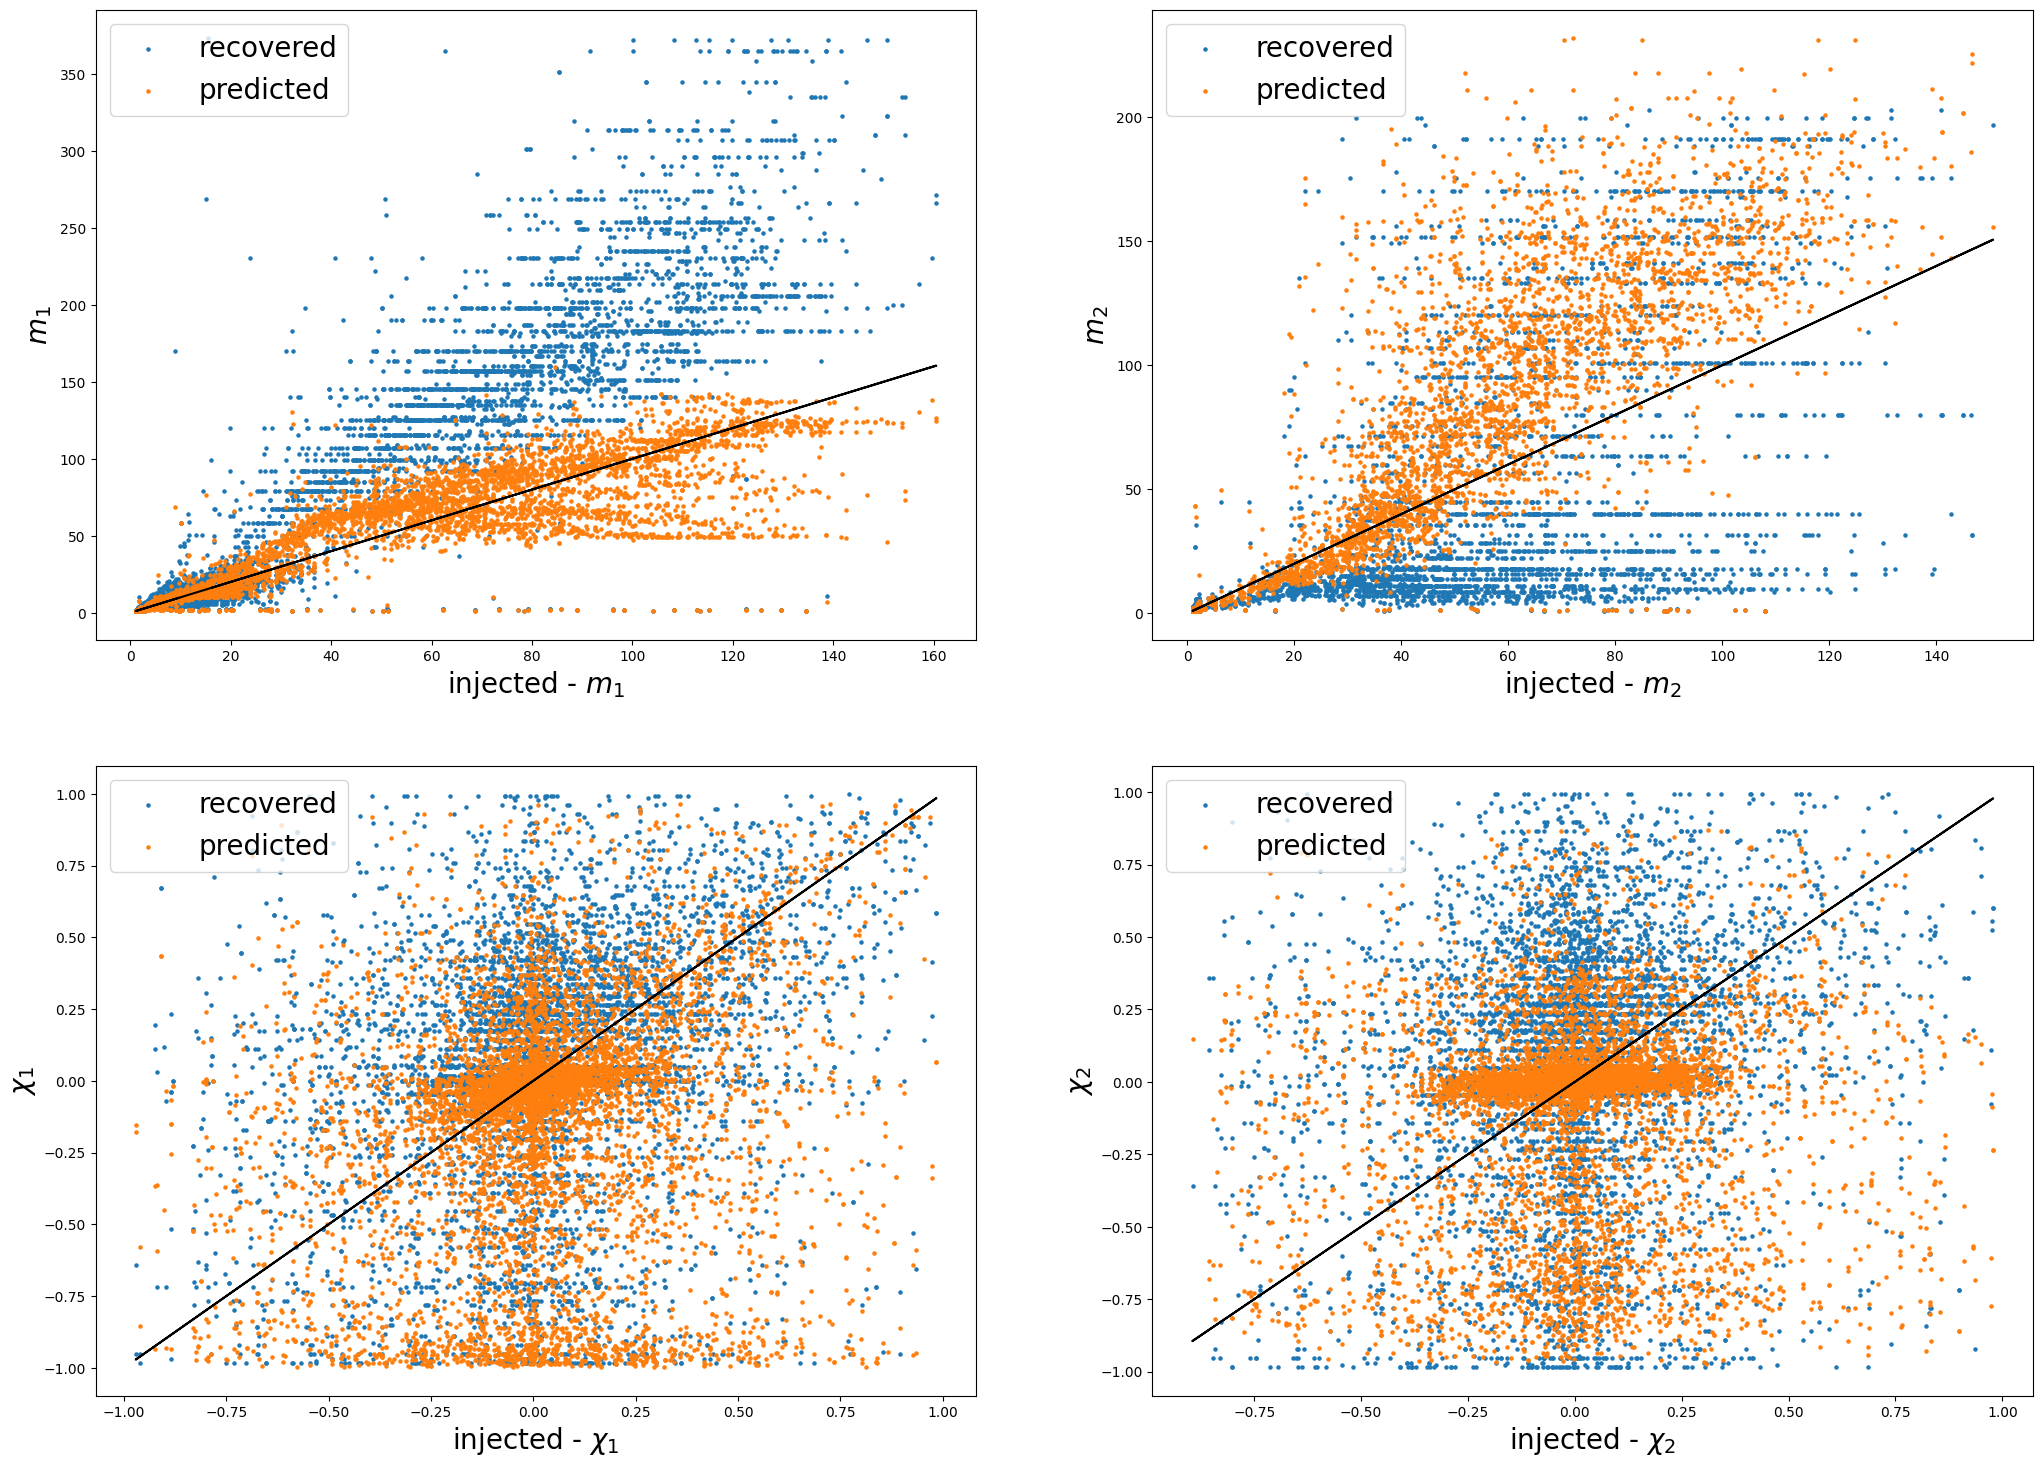

prediction-time:  0.0817776659999998


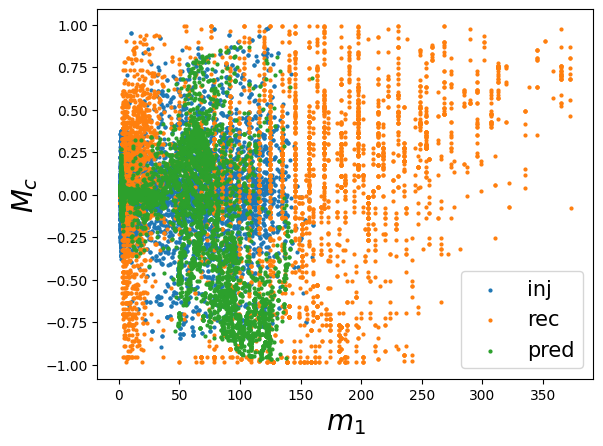

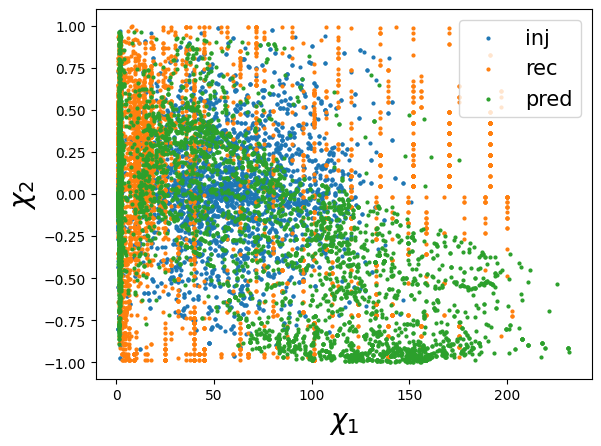

------------------------------------------------ m1 --------------------------------------------------
mean rec   rel diff  :  -0.61593 (std= 0.80283, | rel diff |= 0.71899)
mean pred  rel diff  :  -0.03531 (std= 0.33068, | rel diff |= 0.20999)


median rec   rel diff  :  -0.56229
median pred  rel diff  :  -0.00760


recovery   below fmin=-10.00: 3
recovery   above fmax=  2.00: 0
prediction below fmin=-10.00: 0
prediction above fmax=  2.00: 0


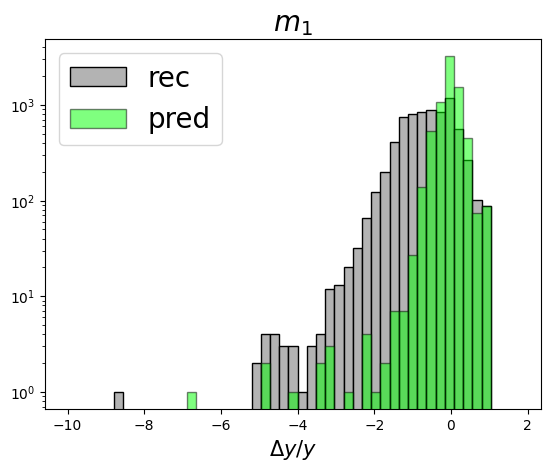

----------------------------------------------   m2 --------------------------------------------------
mean rec   rel diff  :   0.09497 (std= 0.71949, | rel diff |= 0.45955)
mean pred  rel diff  :  -0.24803 (std= 0.76450, | rel diff |= 0.35676)


median rec   rel diff  :   0.17540
median pred  rel diff  :  -0.06409


recovery   below fmin= -3.00: 29
recovery   above fmax=  1.70: 0
prediction below fmin= -3.00: 39
prediction above fmax=  1.70: 0


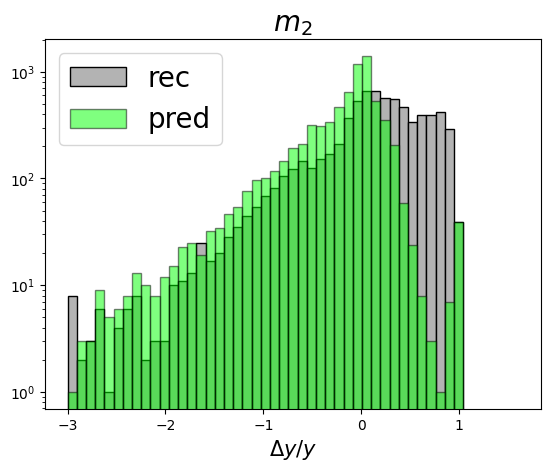

---------------------------------------------- chi1 --------------------------------------------------
mean rec  difference :  -0.02291 (std= 0.41953, |difference|= 0.30252)
mean pred difference :   0.17459 (std= 0.45636, |difference|= 0.33505)


median rec  difference :  -0.04461
median pred difference :   0.06822


recovery   below fmin= -1.70: 0
recovery   above fmax=  1.70: 3
prediction below fmin= -1.70: 0
prediction above fmax=  1.70: 21


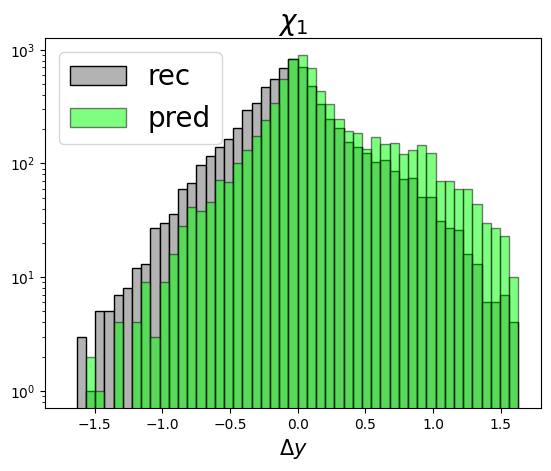

---------------------------------------------- chi2 --------------------------------------------------
mean rec  difference :  -0.04466 (std= 0.43308, |difference|= 0.31980)
mean pred difference :   0.09961 (std= 0.39684, |difference|= 0.27477)


median rec  difference :  -0.05608
median pred difference :   0.02068


recovery   below fmin= -1.70: 1
recovery   above fmax=  1.70: 1
prediction below fmin= -1.70: 0
prediction above fmax=  1.70: 5


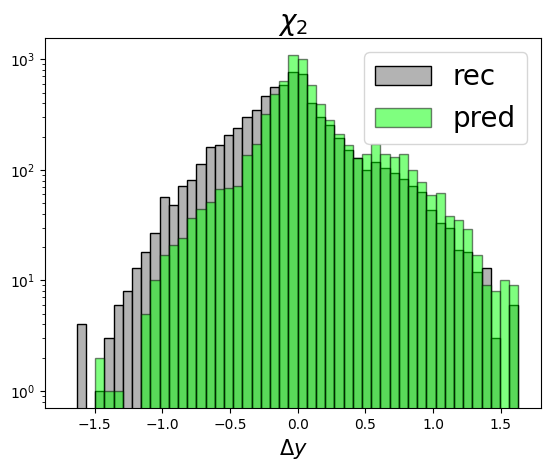






####################################################################################################
                                             pycbc
####################################################################################################

------------------------- R2 for recovery -------------------------
R2[ 0]         : -1.60408
R2[ 1]         : -0.08970
R2[ 2]         : -0.92142
R2[ 3]         : -3.94179
------------------------- R2 for prediction -----------------------
Final R2 mean  : 0.16823
R2[ 0]         : 0.93783
R2[ 1]         : 0.89149
R2[ 2]         : -0.45440
R2[ 3]         : -0.70199
prediction-time:  0.061691249999999975


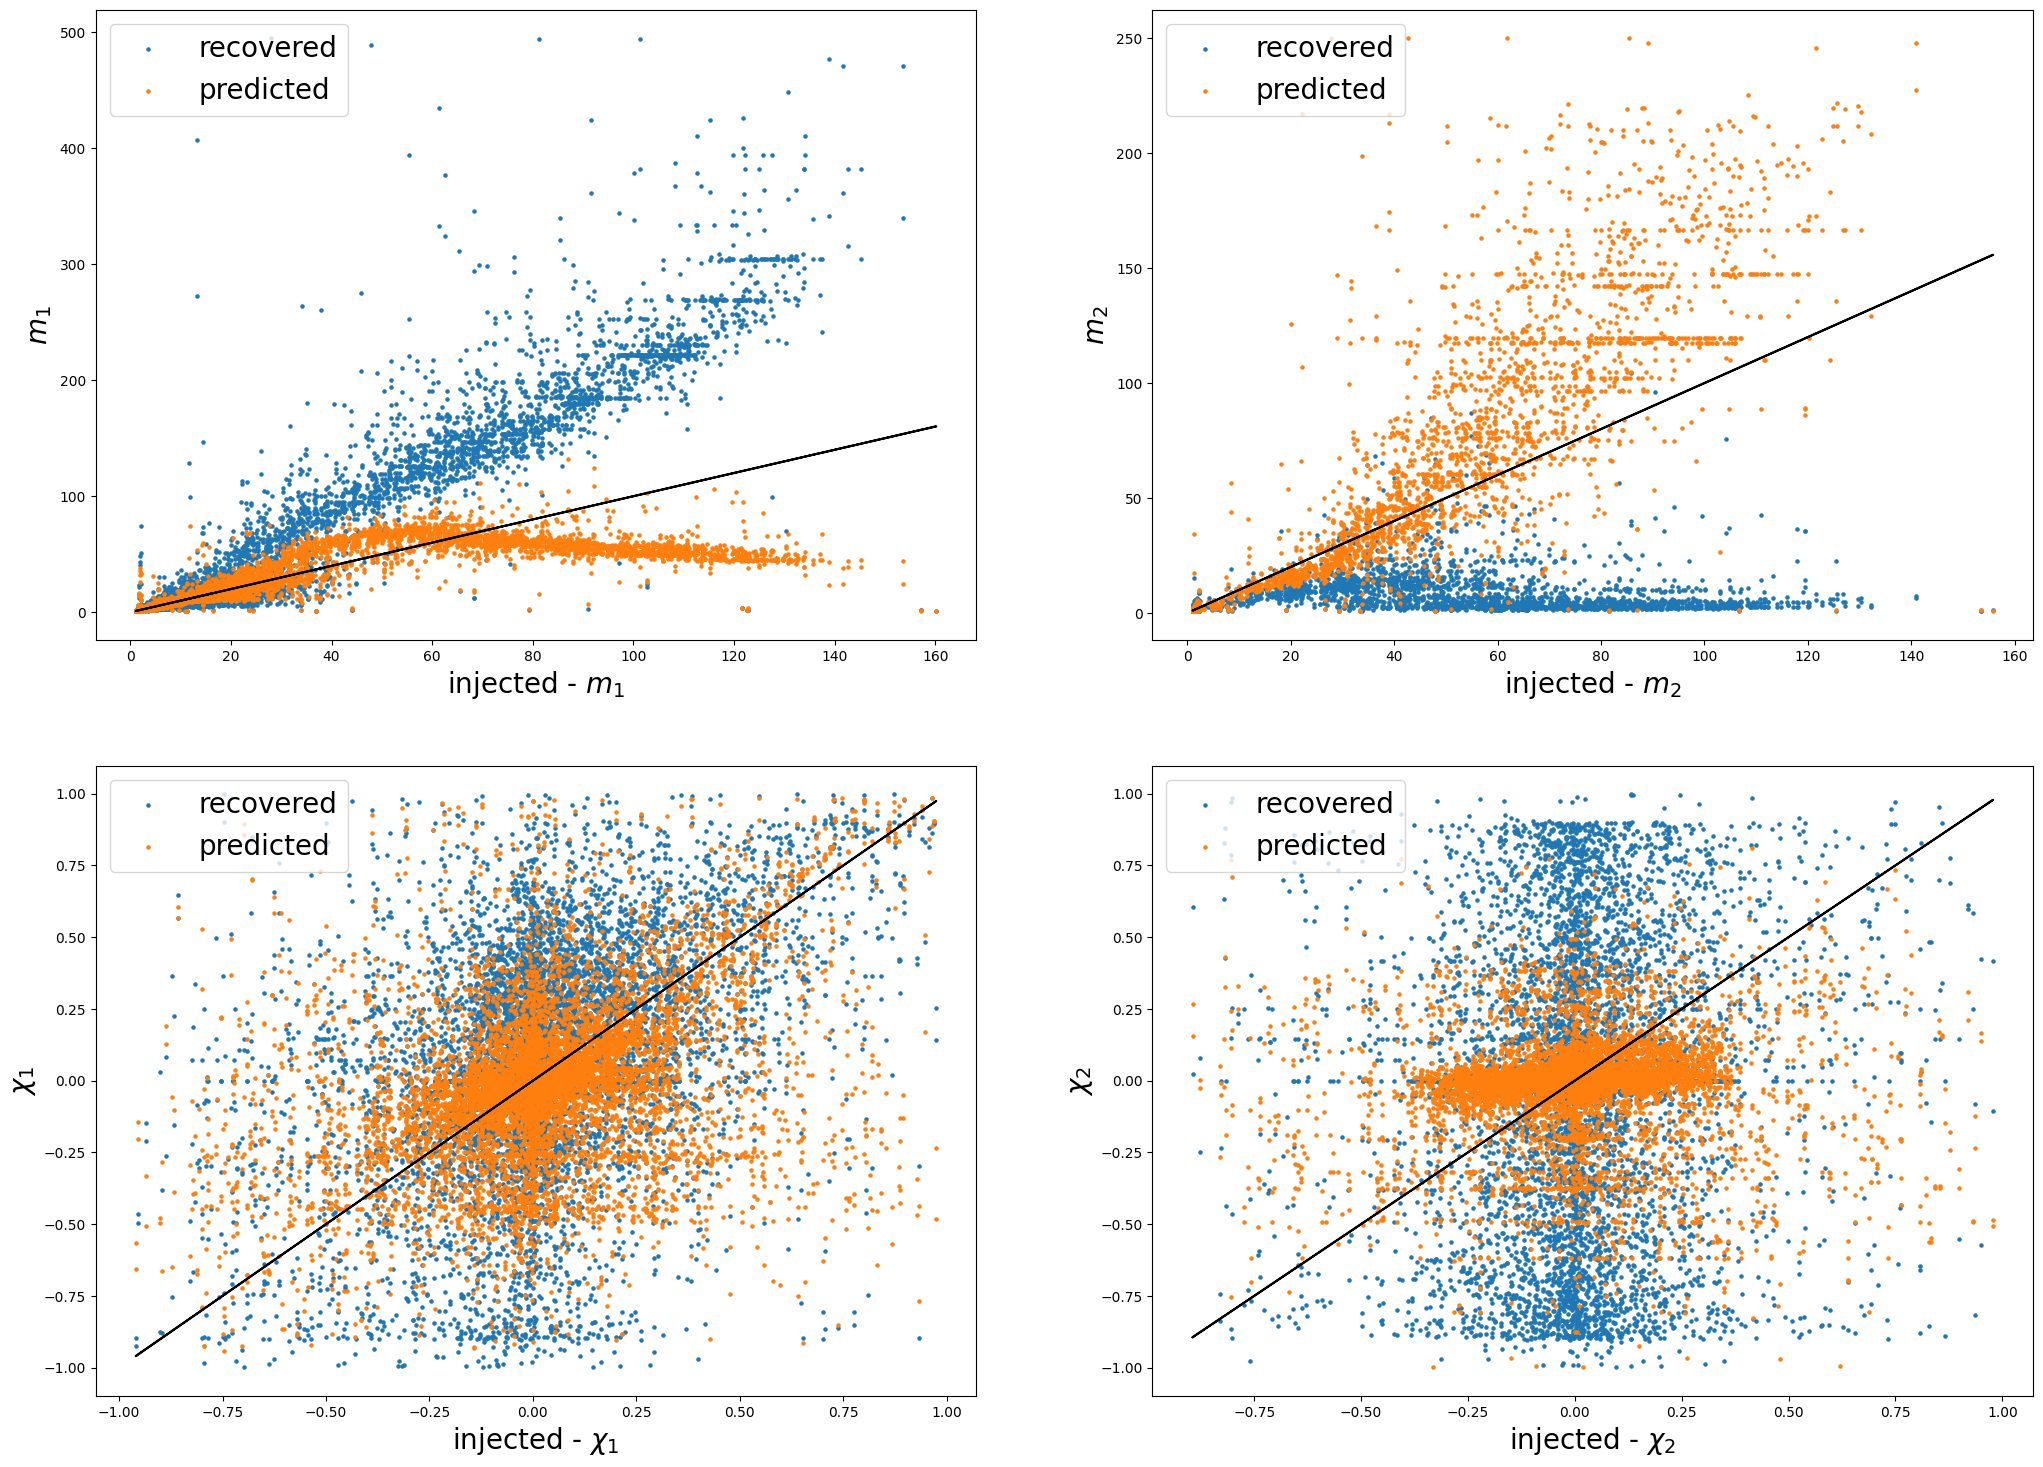

prediction-time:  0.09621241700000027


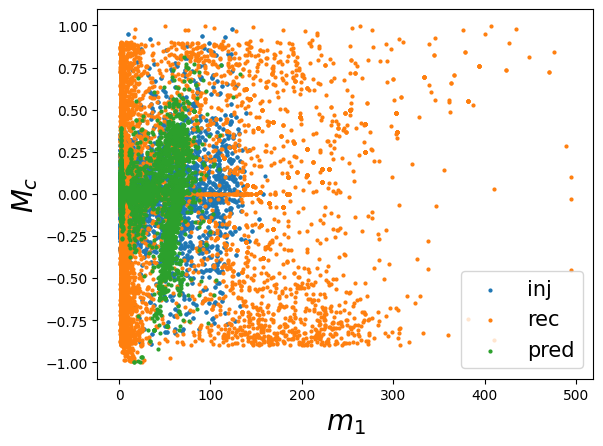

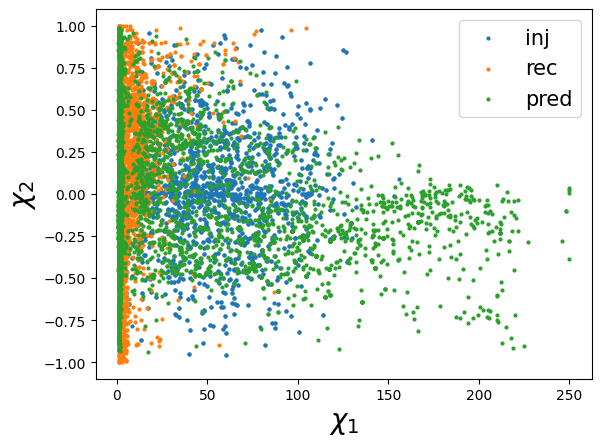

------------------------------------------------ m1 --------------------------------------------------
mean rec   rel diff  :  -0.47697 (std= 1.05642, | rel diff |= 0.62263)
mean pred  rel diff  :  -0.00482 (std= 0.56849, | rel diff |= 0.23290)


median rec   rel diff  :  -0.23929
median pred  rel diff  :   0.01839


recovery   below fmin=-10.00: 12
recovery   above fmax=  2.00: 0
prediction below fmin=-10.00: 6
prediction above fmax=  2.00: 0


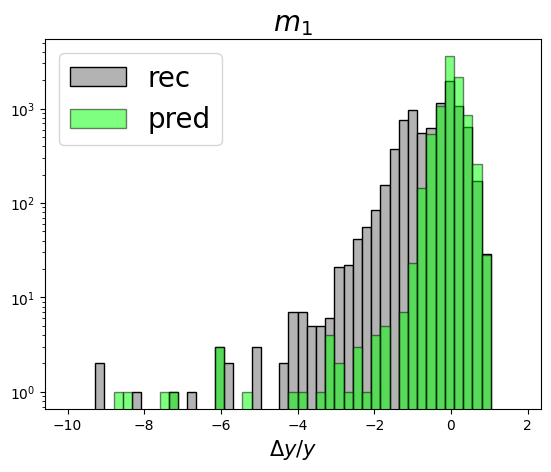

----------------------------------------------   m2 --------------------------------------------------
mean rec   rel diff  :   0.20235 (std= 0.50751, | rel diff |= 0.40469)
mean pred  rel diff  :  -0.10070 (std= 0.52280, | rel diff |= 0.24053)


median rec   rel diff  :   0.17002
median pred  rel diff  :   0.00025


recovery   below fmin= -3.00: 4
recovery   above fmax=  1.70: 0
prediction below fmin= -3.00: 25
prediction above fmax=  1.70: 0


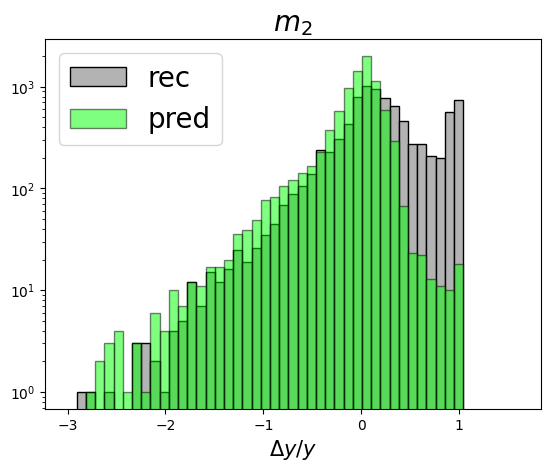

---------------------------------------------- chi1 --------------------------------------------------
mean rec  difference :  -0.03531 (std= 0.36843, |difference|= 0.27271)
mean pred difference :   0.03362 (std= 0.31459, |difference|= 0.21468)


median rec  difference :  -0.03686
median pred difference :   0.01524


recovery   below fmin= -1.70: 1
recovery   above fmax=  1.70: 1
prediction below fmin= -1.70: 0
prediction above fmax=  1.70: 1


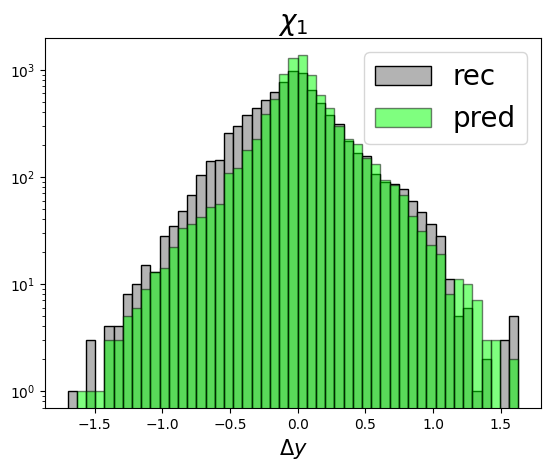

---------------------------------------------- chi2 --------------------------------------------------
mean rec  difference :   0.02470 (std= 0.46004, |difference|= 0.33816)
mean pred difference :   0.01766 (std= 0.26466, |difference|= 0.17187)


median rec  difference :   0.00405
median pred difference :  -0.00452


recovery   below fmin= -1.70: 2
recovery   above fmax=  1.70: 2
prediction below fmin= -1.70: 0
prediction above fmax=  1.70: 0


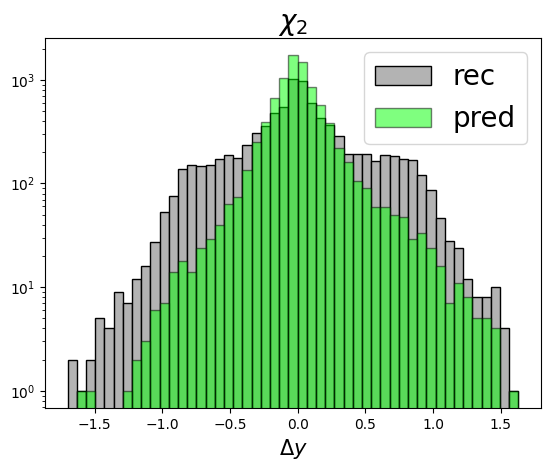






####################################################################################################
                                             mbta
####################################################################################################

------------------------- R2 for recovery -------------------------
R2[ 0]         : -0.92131
R2[ 1]         : 0.00560
R2[ 2]         : -0.61305
R2[ 3]         : -2.88435
------------------------- R2 for prediction -----------------------
Final R2 mean  : 0.45181
R2[ 0]         : 0.97408
R2[ 1]         : 0.95361
R2[ 2]         : 0.02493
R2[ 3]         : -0.14537
prediction-time:  0.028726541999999355


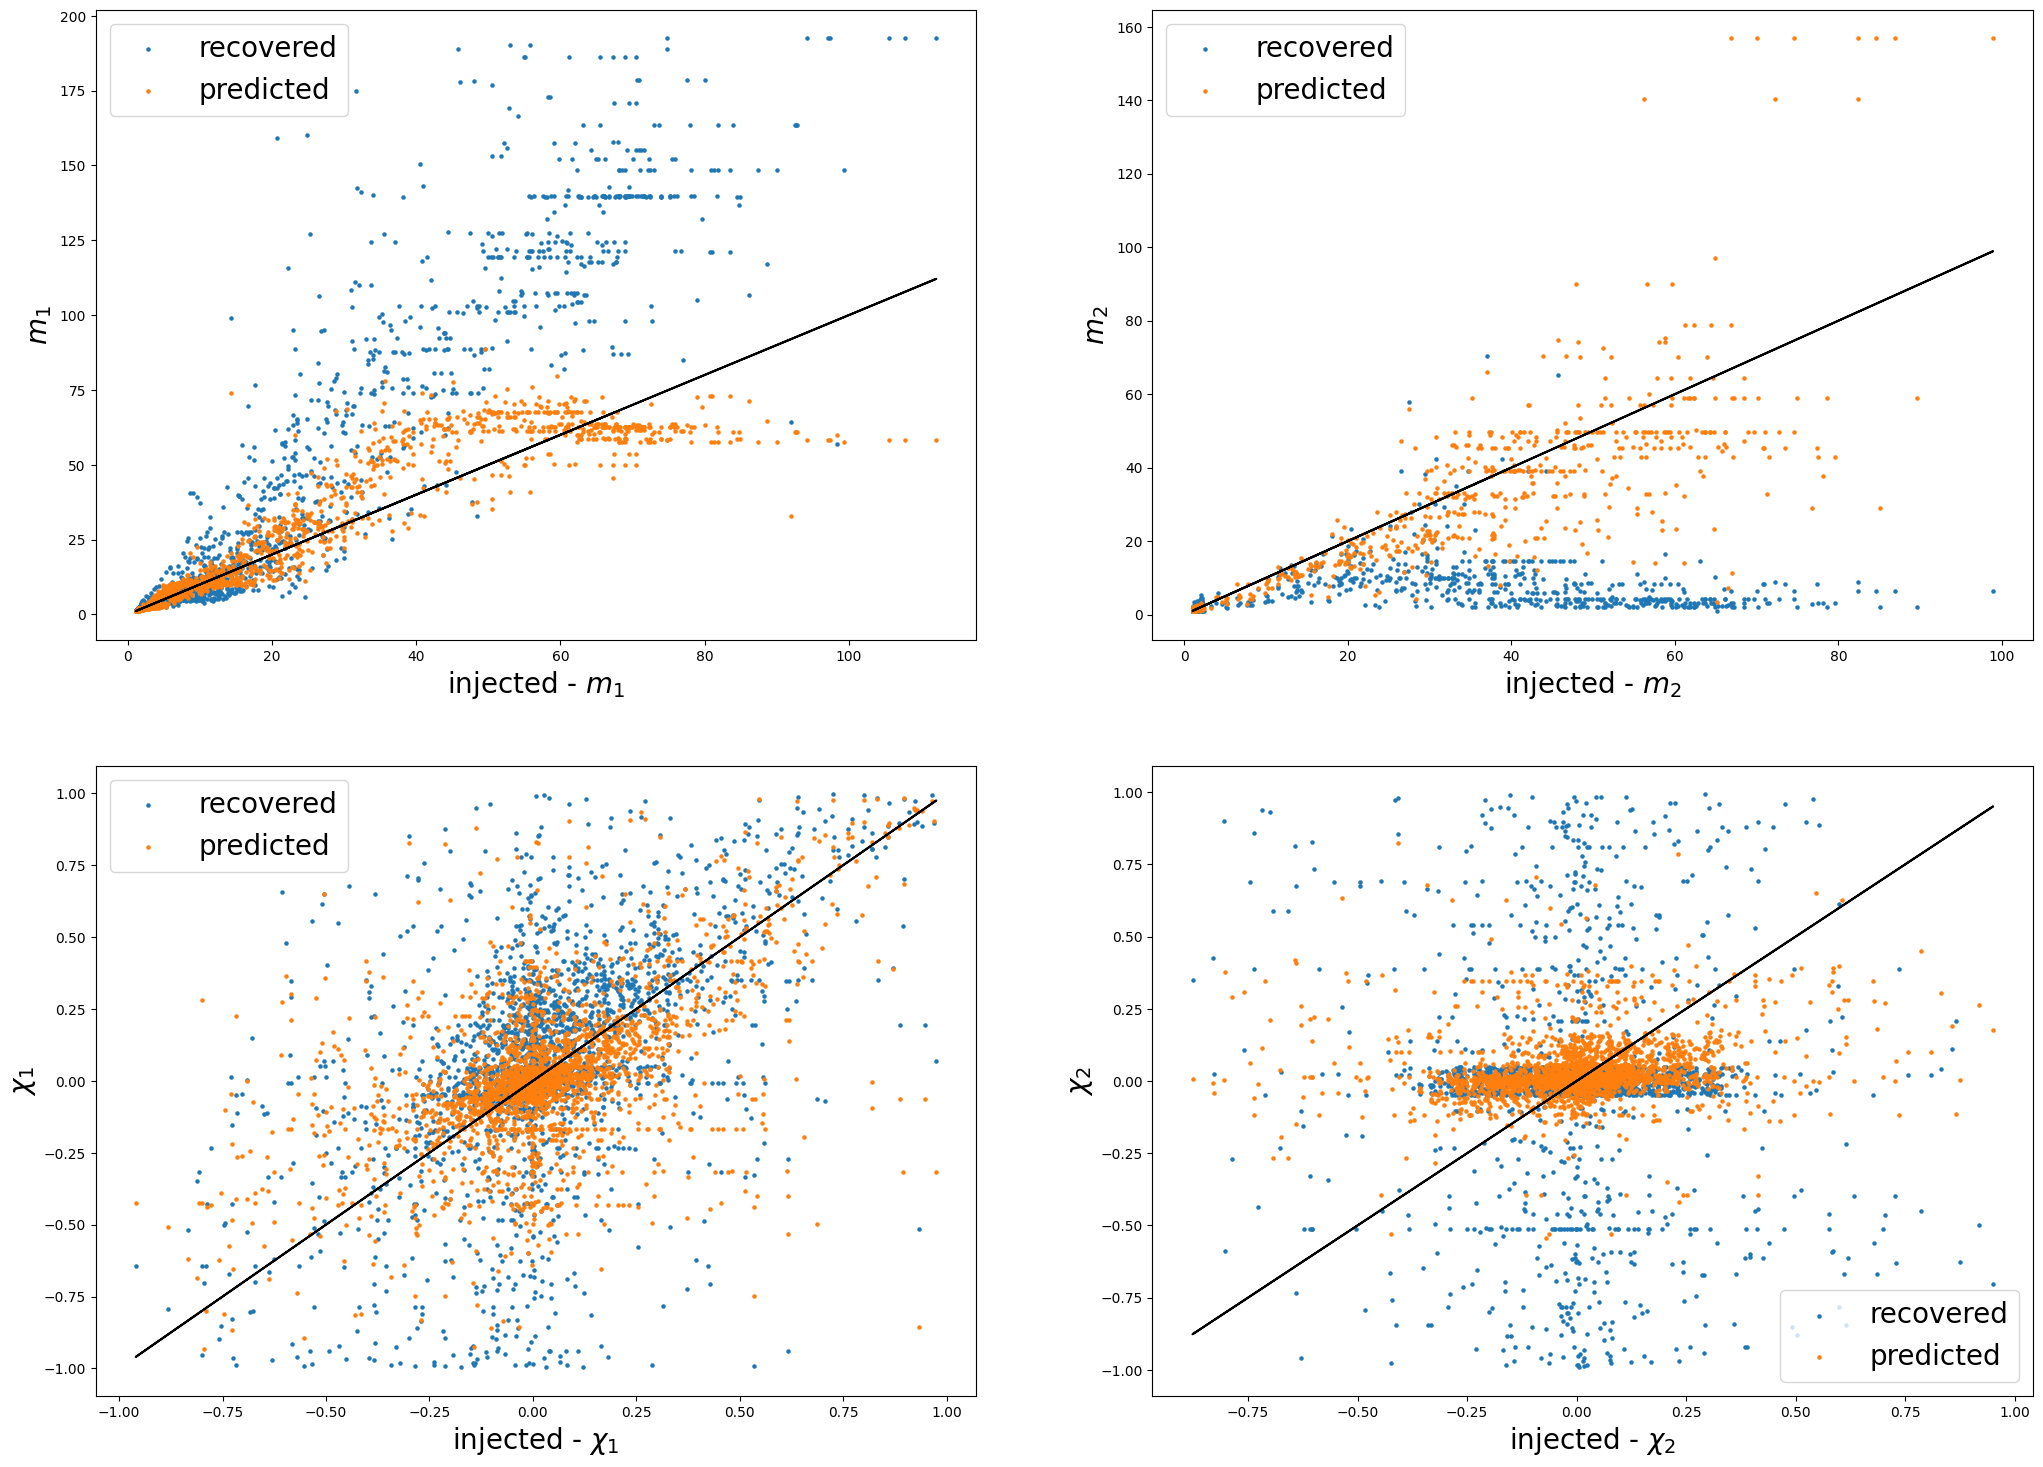

prediction-time:  0.0541133330000001


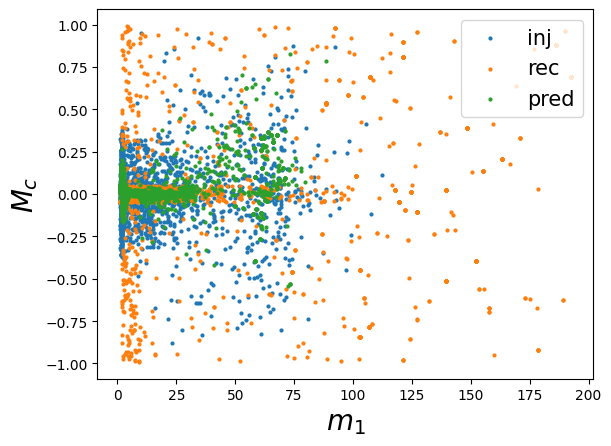

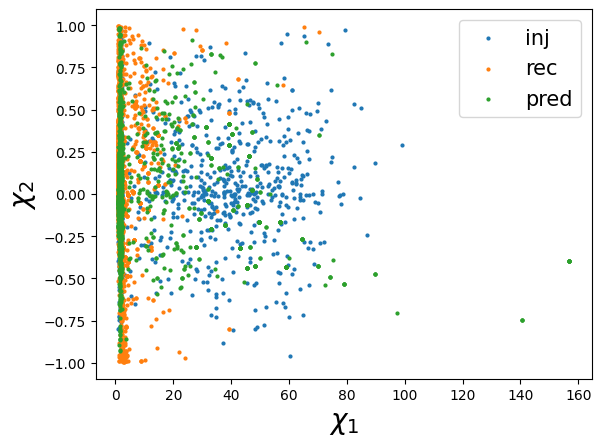

------------------------------------------------ m1 --------------------------------------------------
mean rec   rel diff  :  -0.41702 (std= 0.65496, | rel diff |= 0.51055)
mean pred  rel diff  :  -0.04947 (std= 0.25366, | rel diff |= 0.16854)


median rec   rel diff  :  -0.24074
median pred  rel diff  :  -0.01007


recovery   below fmin=-10.00: 0
recovery   above fmax=  2.00: 0
prediction below fmin=-10.00: 0
prediction above fmax=  2.00: 0


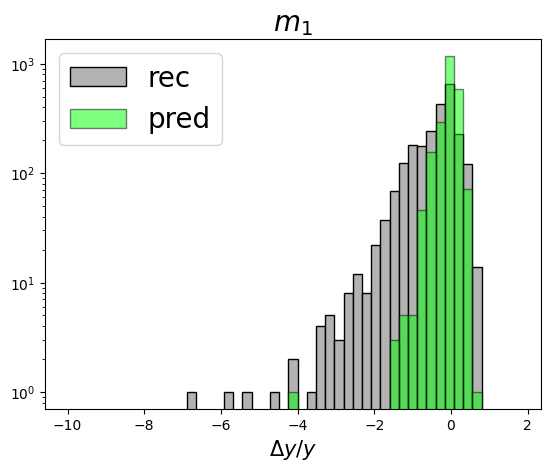

----------------------------------------------   m2 --------------------------------------------------
mean rec   rel diff  :   0.21007 (std= 0.38890, | rel diff |= 0.32780)
mean pred  rel diff  :   0.02936 (std= 0.20867, | rel diff |= 0.14609)


median rec   rel diff  :   0.17106
median pred  rel diff  :   0.03501


recovery   below fmin= -3.00: 0
recovery   above fmax=  1.70: 0
prediction below fmin= -3.00: 0
prediction above fmax=  1.70: 0


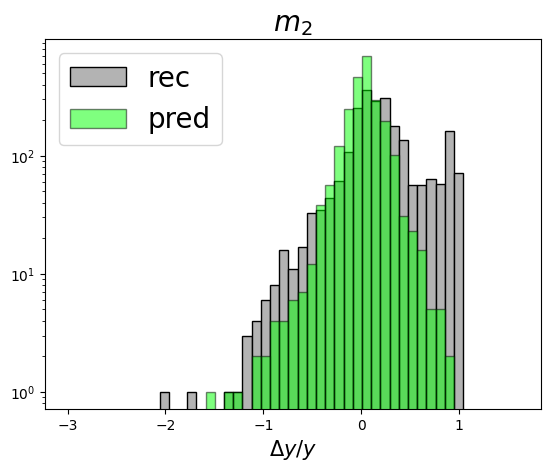

---------------------------------------------- chi1 --------------------------------------------------
mean rec  difference :  -0.03946 (std= 0.32741, |difference|= 0.23012)
mean pred difference :   0.00940 (std= 0.25468, |difference|= 0.16997)


median rec  difference :  -0.05080
median pred difference :   0.00588


recovery   below fmin= -1.70: 0
recovery   above fmax=  1.70: 0
prediction below fmin= -1.70: 0
prediction above fmax=  1.70: 1


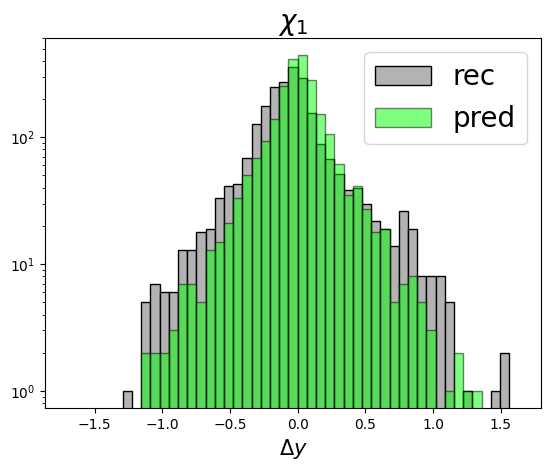

---------------------------------------------- chi2 --------------------------------------------------
mean rec  difference :   0.00969 (std= 0.39155, |difference|= 0.25309)
mean pred difference :  -0.02958 (std= 0.21180, |difference|= 0.14201)


median rec  difference :   0.00401
median pred difference :  -0.01724


recovery   below fmin= -1.70: 1
recovery   above fmax=  1.70: 0
prediction below fmin= -1.70: 0
prediction above fmax=  1.70: 0


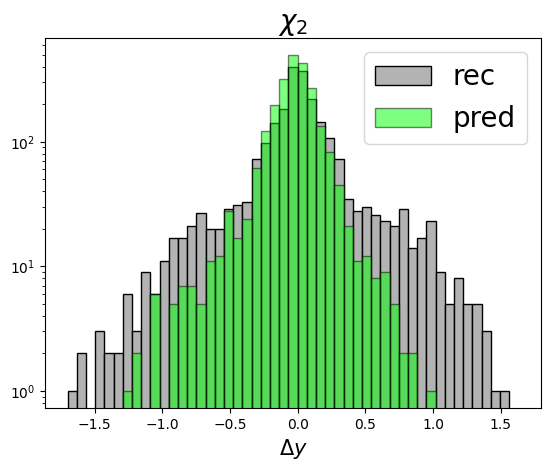

In [11]:
for p in pip_keys:
    print('\n'*5, '#'*100, '\n', ' '*45, p, '\n', '#'*100, '\n', sep='')
    test_inj = pips[p].test_inj
    test_rec = pips[p].test_rec
    ntest    = pips[p].ntest
    
    NNs[p] = copy.deepcopy(loaded_NN)
    NNs[p].load_test_dataset(xtest_data=test_rec, ytest_data=test_inj, verbose=True)

    print('-'*25, 'R2 for recovery', '-'*25)
    for i in range(nfeatures):
        R2 = R2_numpy(test_inj[:,i], test_rec[:,i])  
        print('R2[{:2d}]         : {:.5f}'.format(i,R2))

    print('-'*25, 'R2 for prediction', '-'*23)
    NNs[p].print_metrics()

    prediction_not_transf = NNs[p].compute_prediction(NNs[p].xtest, verbose=True) # normalized prediction
    fp.checkRegressionPlot(NNs[p].xtest, NNs[p].ytest, prediction_not_transf, names, 
                           scaler_y=NNs[p].scaler_y, scaler_x=NNs[p].scaler_x, 
                           show=show_figs, save=save_figs)
    
    predicted = NNs[p].compute_prediction(NNs[p].xtest, transform_output=True, verbose=True)
    injected  = NNs[p].ytest_notnorm
    recovered = NNs[p].xtest_notnorm
    
    plt.figure
    plt.scatter( injected[:,0],  injected[:,3], s=4, label='inj')
    plt.scatter(recovered[:,0], recovered[:,3], s=4, label='rec')
    plt.scatter(predicted[:,0], predicted[:,3], s=4, label='pred')
    plt.xlabel(r'$m_1$', fontsize=20)
    plt.ylabel(r'$M_c$', fontsize=20)
    plt.legend(fontsize=15)
    plt.show()

    plt.figure
    plt.scatter( injected[:,1],  injected[:,2], s=4, label='inj')
    plt.scatter(recovered[:,1], recovered[:,2], s=4, label='rec')
    plt.scatter(predicted[:,1], predicted[:,2], s=4, label='pred')
    plt.xlabel(r'$\chi_1$', fontsize=20)
    plt.ylabel(r'$\chi_2$', fontsize=20)
    plt.legend(fontsize=15)
    plt.show()
    
    for i in range(nfeatures):
        print('-'*(50-len(nolatex_names[i])), nolatex_names[i], '-'*50)
        NNs[p].plot_err_histogram(feature_idx=i, fmin=fmin_vec[i], fmax=fmax_vec[i], verbose=True, 
                              abs_diff=abs_diff_vec[i], name=names[i], show=show_figs, save=save_figs, 
                              logscale=logscale_vec[i], nbins=50)
    
    del test_inj, test_rec, ntest, predicted, prediction_not_transf, injected, recovered